<a href="https://colab.research.google.com/github/MoBanju/power-consumption/blob/main/PowerConsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24-h forecast (x2) of power consumption based on historical consumption data and temperature data of a cooling factory.

## Load data

In [36]:
import numpy as np
import pandas as pd

In [37]:
data = pd.read_excel('data/Hackathon_Data.xlsx')
data.head(25)

,DateAndHour,Load_data,Temperature
0,2023-03-23 00:00:00,284,7.422725
1,2023-03-23 01:00:00,265.6,7.422725
2,2023-03-23 02:00:00,121.6,6.422725
3,2023-03-23 03:00:00,172.4,6.622725
4,2023-03-23 04:00:00,271.6,6.622725
5,2023-03-23 05:00:00,147.6,6.522725
6,2023-03-23 06:00:00,226,6.722725
7,2023-03-23 07:00:00,273.6,6.622725
8,2023-03-23 08:00:00,146,6.822725
9,2023-03-23 09:00:00,254,6.222725


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateAndHour  8976 non-null   datetime64[ns]
 1   Load_data    8930 non-null   object        
 2   Temperature  8976 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 210.5+ KB


In [39]:
data.isnull().sum()

,0
DateAndHour,0
Load_data,46
Temperature,0


## Cleaning the data

In [40]:
data.columns = ['Date and Hour', 'Energy (kwh)', 'Temperature (C)']
data

,Date and Hour,Energy (kwh),Temperature (C)
0,2023-03-23 00:00:00,284,7.422725
1,2023-03-23 01:00:00,265.6,7.422725
2,2023-03-23 02:00:00,121.6,6.422725
3,2023-03-23 03:00:00,172.4,6.622725
4,2023-03-23 04:00:00,271.6,6.622725
...,...,...,...
8971,2024-03-30 19:00:00,NaN,8.922725
8972,2024-03-30 20:00:00,NaN,8.022725
8973,2024-03-30 21:00:00,NaN,7.722725
8974,2024-03-30 22:00:00,NaN,8.122725


Season

In [41]:
# Define a function to determine the season
def get_season(date):
    date = date.replace(hour=0, minute=0, second=0, microsecond=0)
    year = date.year
    seasons = {
        1: pd.date_range(start=f'{year}-03-01', end=f'{year}-05-31'), # Spring
        2: pd.date_range(start=f'{year}-06-01', end=f'{year}-08-31'), # Summer
        3: pd.date_range(start=f'{year}-09-01', end=f'{year}-11-30'), # Autumn
        4: pd.date_range(start=f'{year}-12-01', end=f'{year + 1}-02-28') # Winter
    }
    for season, season_range in seasons.items():
        if date in season_range:
            return season
    return 4  # Default to winter if not found, handles leap years

In [42]:
def get_season_name(season_num):
  if season_num == 1:
    return 'Spring'
  elif season_num == 2:
    return 'Summer'
  elif season_num == 3:
    return 'Autumn'
  elif season_num == 4:
    return 'Winter'
  else:
    return 'Unknown'

Public Holidays

In [43]:
from holidays import Norway

In [44]:
def get_public_holidays(date):
  return date in Norway()

In [45]:
data['Date'] = data['Date and Hour'].dt.date
data['Year'] = data['Date and Hour'].dt.year
data['Month'] = data['Date and Hour'].dt.month
data['Day'] = data['Date and Hour'].dt.day
data['Time'] = data['Date and Hour'].dt.time
data['Hour'] = data['Date and Hour'].dt.hour
data['Week Day (Unicode)'] = data['Date and Hour'].dt.weekday
data['Week Day'] = data['Date and Hour'].dt.day_name()
data['Week'] = data['Week Day (Unicode)'].apply(lambda x: 0 if x >= 5 else 1)
data['Season (Unicode)'] = data['Date and Hour'].apply(get_season)
data['Season'] = data['Season (Unicode)'].apply(get_season_name)
data['Holiday'] = data['Date and Hour'].apply(get_public_holidays).astype(int)

data['Energy (kwh)']= pd.to_numeric(data['Energy (kwh)'], errors='coerce')

#data.drop('Date and Hour', axis=1, inplace=True)
data = data[['Date and Hour', 'Date', 'Year', 'Month', 'Day', 'Week', 'Week Day (Unicode)', 'Week Day', 'Time', 'Hour', 'Season (Unicode)','Season', 'Holiday', 'Energy (kwh)', 'Temperature (C)']]
data

,Date and Hour,Date,Year,Month,Day,Week,Week Day (Unicode),Week Day,Time,Hour,Season (Unicode),Season,Holiday,Energy (kwh),Temperature (C)
0,2023-03-23 00:00:00,2023-03-23,2023,3,23,1,3,Thursday,00:00:00,0,1,Spring,0,284.0,7.422725
1,2023-03-23 01:00:00,2023-03-23,2023,3,23,1,3,Thursday,01:00:00,1,1,Spring,0,265.6,7.422725
2,2023-03-23 02:00:00,2023-03-23,2023,3,23,1,3,Thursday,02:00:00,2,1,Spring,0,121.6,6.422725
3,2023-03-23 03:00:00,2023-03-23,2023,3,23,1,3,Thursday,03:00:00,3,1,Spring,0,172.4,6.622725
4,2023-03-23 04:00:00,2023-03-23,2023,3,23,1,3,Thursday,04:00:00,4,1,Spring,0,271.6,6.622725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,2024-03-30 19:00:00,2024-03-30,2024,3,30,0,5,Saturday,19:00:00,19,1,Spring,0,NaN,8.922725
8972,2024-03-30 20:00:00,2024-03-30,2024,3,30,0,5,Saturday,20:00:00,20,1,Spring,0,NaN,8.022725
8973,2024-03-30 21:00:00,2024-03-30,2024,3,30,0,5,Saturday,21:00:00,21,1,Spring,0,NaN,7.722725
8974,2024-03-30 22:00:00,2024-03-30,2024,3,30,0,5,Saturday,22:00:00,22,1,Spring,0,NaN,8.122725


## Visualisation

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [47]:
fig_line = px.line(data, x='Hour', y='Energy (kwh)', title='Energy Consumption Over Time', animation_frame='Date')
fig_line.update_layout(xaxis_title='Hour', yaxis_title='Energy (kWh)')
fig_line.update_yaxes(range=[0, 500])

fig_line.show()

In [48]:
fig_pie = px.pie(data, values='Energy (kwh)', names='Season', title='Energy Consumption by Season', color='Season',
                 color_discrete_sequence=['forestgreen', 'orangered', 'brown', 'lightblue'])
fig_pie.show()

In [49]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Calculate median values
median_energy = data.groupby('Week Day')['Energy (kwh)'].median().reset_index()

fig = px.bar(median_energy, x='Week Day', y='Energy (kwh)',
             title='Median Energy Consumption by Day',
             color='Week Day',
             category_orders={'Week Day': weekday_order})
fig.show()

In [50]:
numerical_features = [ 'Year', 'Month', 'Day', 'Week', 'Week Day (Unicode)', 'Hour', 'Season (Unicode)', 'Holiday', 'Temperature (C)', 'Energy (kwh)']
data_corr = data[numerical_features]

corr = data_corr.corr()
corr_energy = data_corr.corr()['Energy (kwh)'].drop('Energy (kwh)')
corr_energy_na = data_corr.corr()['Energy (kwh)'].dropna().drop('Energy (kwh)')

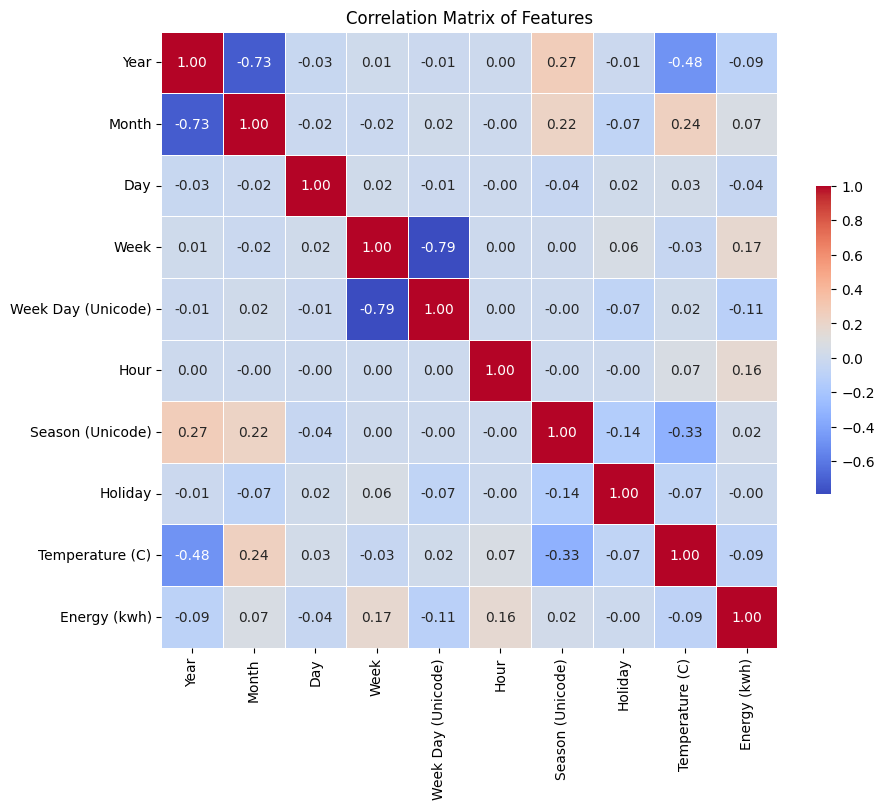

In [51]:
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix of Features')
plt.show()

In [52]:
corr_energy.sort_values(ascending=False)

,Energy (kwh)
Week,0.172570
Hour,0.161753
Month,0.069826
Season (Unicode),0.023709
Holiday,-0.004589
Day,-0.038444
Temperature (C),-0.088008
Year,-0.091392
Week Day (Unicode),-0.109384


## Preprocessing and Future Engineering

In [53]:
# Split the data into training and data with missing 'Load_data'
train_data = data.dropna(subset=['Energy (kwh)'])
predict_data = data[data['Energy (kwh)'].isna()]

# Prepare features and target for the model
#features = ['Date', 'Month', 'Week', 'Time', 'Week Day', 'Season', 'Holiday', 'Temperature (C)']
features = ['Month', 'Week', 'Hour', 'Season (Unicode)']

X_train = train_data[features]

y_train = train_data['Energy (kwh)']

X_predict = predict_data[features]

## Train and Predict

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
predicted_linear = model.predict(X_predict)

# Fill missing values in the original dataset
#data.loc[data['Energy (kwh)'].isna(), 'Energy (kwh)'] = predicted_linear

# Display the portion of the dataset where missing values were filled
#data[data['Energy (kwh)'].isin(predicted_linear)]


### Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
# Initialize the model
reg = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

# Train the model
reg.fit(X_train, y_train)

# Make predictions
predicted_forest = reg.predict(X_predict)

# Fill missing values in the original dataset
data.loc[data['Energy (kwh)'].isna(), 'Energy (kwh)'] = predicted_forest

# Display the portion of the dataset where missing values were filled
data[data['Energy (kwh)'].isin(predicted_forest)]

,Date and Hour,Date,Year,Month,Day,Week,Week Day (Unicode),Week Day,Time,Hour,Season (Unicode),Season,Holiday,Energy (kwh),Temperature (C)
8856,2024-03-26 00:00:00,2024-03-26,2024,3,26,1,1,Tuesday,00:00:00,0,1,Spring,0,224.130814,2.722725
8857,2024-03-26 01:00:00,2024-03-26,2024,3,26,1,1,Tuesday,01:00:00,1,1,Spring,0,184.346613,2.322725
8858,2024-03-26 02:00:00,2024-03-26,2024,3,26,1,1,Tuesday,02:00:00,2,1,Spring,0,195.144619,2.422725
8859,2024-03-26 03:00:00,2024-03-26,2024,3,26,1,1,Tuesday,03:00:00,3,1,Spring,0,178.792989,2.722725
8860,2024-03-26 04:00:00,2024-03-26,2024,3,26,1,1,Tuesday,04:00:00,4,1,Spring,0,197.876977,2.822725
8861,2024-03-26 05:00:00,2024-03-26,2024,3,26,1,1,Tuesday,05:00:00,5,1,Spring,0,182.202144,2.222725
8862,2024-03-26 06:00:00,2024-03-26,2024,3,26,1,1,Tuesday,06:00:00,6,1,Spring,0,199.735492,2.422725
8863,2024-03-26 07:00:00,2024-03-26,2024,3,26,1,1,Tuesday,07:00:00,7,1,Spring,0,190.609534,2.122725
8864,2024-03-26 08:00:00,2024-03-26,2024,3,26,1,1,Tuesday,08:00:00,8,1,Spring,0,225.849053,2.322725
8865,2024-03-26 09:00:00,2024-03-26,2024,3,26,1,1,Tuesday,09:00:00,9,1,Spring,0,216.655985,2.722725


### Gradient Boosting Machine

In [58]:
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
# Initialize the model
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)  # 100 trees in the forest

# Train the model
gbm.fit(X_train, y_train)

# Make predictions
predictions_gbm = gbm.predict(X_predict)
#predictions_gbm.s

## Model Evaluation

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [61]:
# Splitting training data for model validation
X_Scaled = StandardScaler().fit_transform(X_train)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### Linear Regression

In [62]:
# Validate the model
lr_predictions_val = model.predict(X_val)

lr_mse = mean_squared_error(y_val, lr_predictions_val)
lr_mape = mean_absolute_percentage_error(y_val, lr_predictions_val)
print(f'Mean Squared Error: {lr_mse}')
print(f'Mean Absolute Percentage Error: {lr_mape}%')

Mean Squared Error: 6578.679806293839
Mean Absolute Percentage Error: 3669428423404691.5%


### Random Forest

In [63]:
# Validate the model
rf_predictions_val = reg.predict(X_val)

rf_mse = mean_squared_error(y_val, rf_predictions_val)
rf_mape = mean_absolute_percentage_error(y_val, rf_predictions_val)
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Percentage Error: {rf_mape}%')

Mean Squared Error: 3721.7333221481945
Mean Absolute Percentage Error: 1418481148457336.8%


### Gradient Boosting Machine

In [64]:
gbm_predictions_val = gbm.predict(X_val)

gbm_mse = mean_squared_error(y_val, gbm_predictions_val)
gbm_mape = mean_absolute_percentage_error(y_val, gbm_predictions_val)
print(f'Mean Squared Error: {gbm_mse}')
print(f'Mean Absolute Percentage Error: {gbm_mape}%')

Mean Squared Error: 4113.869951580493
Mean Absolute Percentage Error: 2059136847324669.5%


## Save the updated dataset

In [65]:
# Save the updated dataset back to an Excel file
output_path = 'data/Updated_Hackathon_Data.xlsx'  # Update the path accordingly
data_to_save = pd.read_excel('data/Hackathon_Data.xlsx')
data_to_save['Load_data'] = data['Energy (kwh)']
data_to_save.to_excel(output_path, index=False)

## Actual vs Prediction

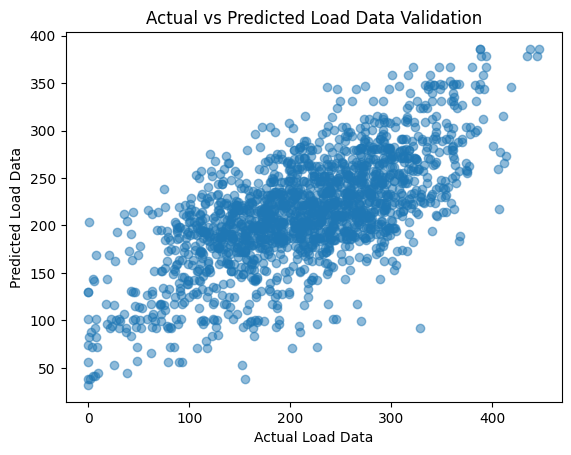

In [66]:
plt.scatter(y_val, rf_predictions_val, alpha=0.5)
plt.xlabel('Actual Load Data')
plt.ylabel('Predicted Load Data')
plt.title('Actual vs Predicted Load Data Validation')
plt.show()

In [70]:
data[data['Date'] == ]

,Date and Hour,Date,Year,Month,Day,Week,Week Day (Unicode),Week Day,Time,Hour,Season (Unicode),Season,Holiday,Energy (kwh),Temperature (C)


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date and Hour       8976 non-null   datetime64[ns]
 1   Date                8976 non-null   object        
 2   Year                8976 non-null   int32         
 3   Month               8976 non-null   int32         
 4   Day                 8976 non-null   int32         
 5   Week                8976 non-null   int64         
 6   Week Day (Unicode)  8976 non-null   int32         
 7   Week Day            8976 non-null   object        
 8   Time                8976 non-null   object        
 9   Hour                8976 non-null   int32         
 10  Season (Unicode)    8976 non-null   int64         
 11  Season              8976 non-null   object        
 12  Holiday             8976 non-null   int64         
 13  Energy (kwh)        8976 non-null   float64     

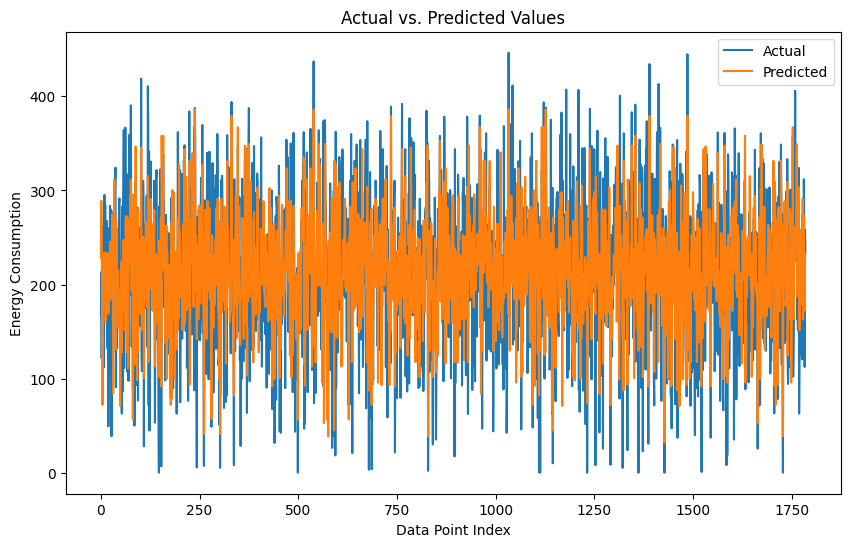

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(y_val.values, label='Actual')
plt.plot(rf_predictions_val, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point Index')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()